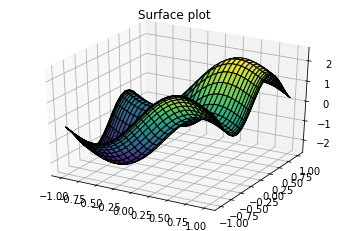

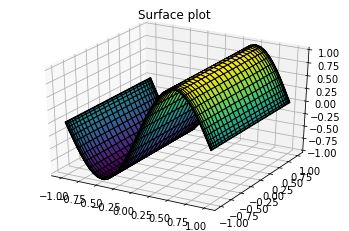

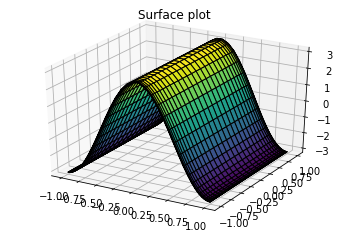

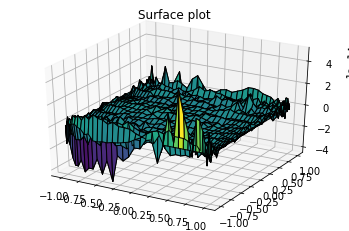

In [14]:
from pypde.field import *
N,M = 40,30
shape = (N,M)
field = Field(shape,("CD","CN"))

# Spatial info
xx,yy = np.meshgrid(field.x,field.y,indexing="ij")
f = np.sin(np.pi* xx)+xx+np.sin(4*yy)
field.v = f

# Boundary conditions
bc = np.zeros((2,M))
bc[0,:] = -1+np.sin(4*field.y)
bc[1,:] =  1+np.sin(4*field.y)
field_bc = FieldBC(shape,("CD","CN"),axis=0)
field_bc.add_bc(bc)

# Extract Homogeneous part of f
field.add_field_bc(field_bc)
field.v = field.make_homogeneous()

# Transform
field.forward()
field.backward()

# Plot
from pypde.plot.wireframe import plot 
plot(xx,yy,f)
#plot(xx,yy,field.inhomogeneous)
plot(xx,yy,field.homogeneous)
#plot(xx,yy,field.total)

# Derivative along x
field_deriv = derivative_field(field,deriv=(1,0))
plot(xx,yy,field_deriv.v)

# Derivative along y
field_deriv = derivative_field(field,deriv=(0,1))
plot(xx,yy,field_deriv.v)

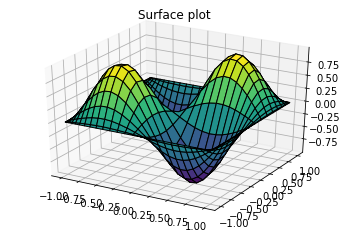

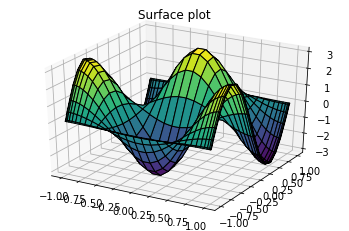

In [2]:
shape = (30,20)
    
# Set field
field = Field(shape,("CD","CN"))
xx,yy = np.meshgrid(field.x,field.y,indexing="ij")

f = np.sin(np.pi* xx)*np.sin(np.pi*yy)
field.v = f
field.forward()

# Get derivative
deriv_field = derivative_field(field,deriv=(1,0))
deriv_field.backward()

from pypde.plot.wireframe import plot
plot(xx,yy,field.v)
plot(xx,yy,deriv_field.v)

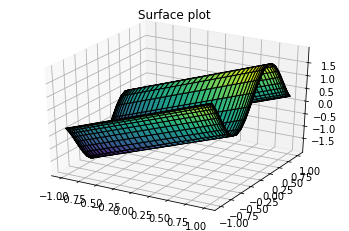

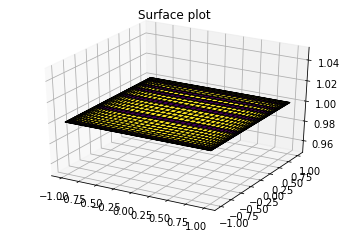

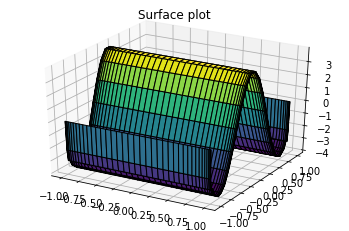

In [8]:
from pypde.field import *
N,M = 40,30
shape = (N,M)

# Field BC
field_bc = FieldBC(shape,("CD","CN"),axis=0)
xx,yy = np.meshgrid(field_bc.x,field_bc.y,indexing="ij")

bc = np.zeros((2,M))
bc[0,:] = -1+np.sin(4*field_bc.y)
bc[1,:] =  1+np.sin(4*field_bc.y)
field_bc.add_bc(bc)

from pypde.plot.wireframe import plot
plot(xx,yy,field_bc.v)

# Derivative along x
field_bc_deriv = derivative_field(field_bc,deriv=(1,0))
plot(xx,yy,field_bc_deriv.v)

# Derivative along y
field_bc_deriv = derivative_field(field_bc,deriv=(0,1))
plot(xx,yy,field_bc_deriv.v)